#tin diferente faktor ku por afekta e manera ku lo bo por paga pa seguro di bida ku no ta bou di bo kontrol 
#ta bon pa kompronde kua nan ta Factor nan ku por hunga un rol ;

*Age

*Sex

*Bmi : ## Body mass index, providing an understanding of body, weights that are relatively high or low relative to  height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

*Children

*Smoker

*Region

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Krea\Documents\Data science python\Data Science Insurance\insurance_cost.csv') #import csv files
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# tin 0 missing Value dus nos ta riba bon kaminda

## wak kon e charges nan ta distruibi den a factor nan ariba menshona ku EDA Graph


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Text(0.5, 1.0, 'Distribiution of Charges ')

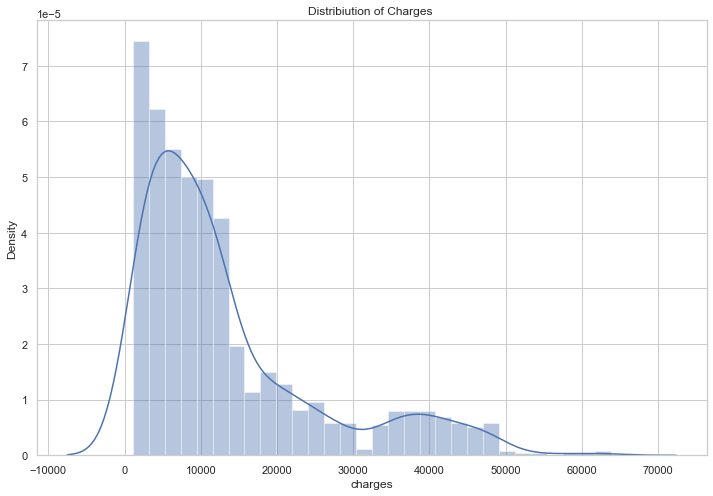

In [7]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1 , figsize=(12,8) )
ax = sns.distplot(df ['charges'], kde = True, color= 'b')
plt.title('Distribiution of Charges ')

In [8]:
#e distribution ariba ^ aki ta  right-skewed. pa hasie mas serka di normal  por aplika natural log 

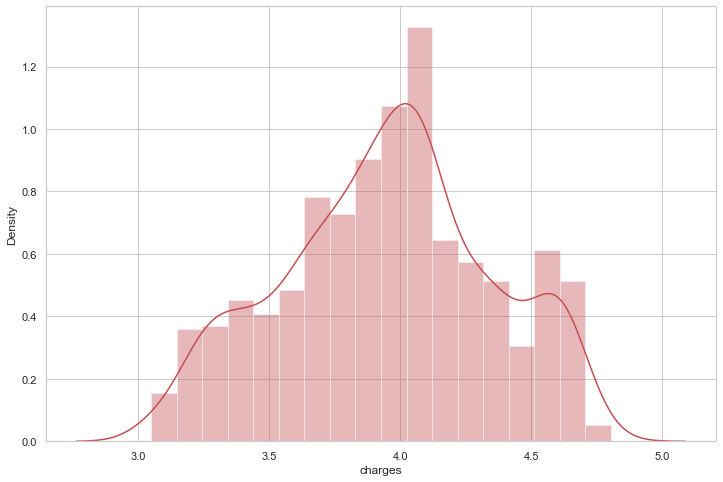

In [9]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.distplot(np.log10(df['charges']), kde = True , color = 'r')

## wak charges nan pa region (stad)

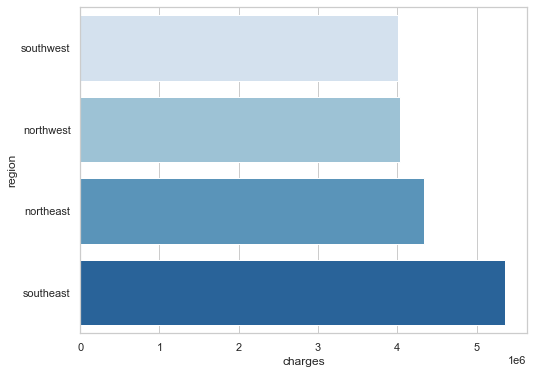

In [10]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1 ,1, figsize=(8,6))
ax = sns.barplot(charges.head(), charges.head().index, palette ='Blues')


In [11]:
#e charges nan di mas haltu ta southweat i  i esnan mas abou ta  Southwest. teniendo kuenta ku e factor nan  (sex, smoking, having children) ban wak kon eta kambia pa region :

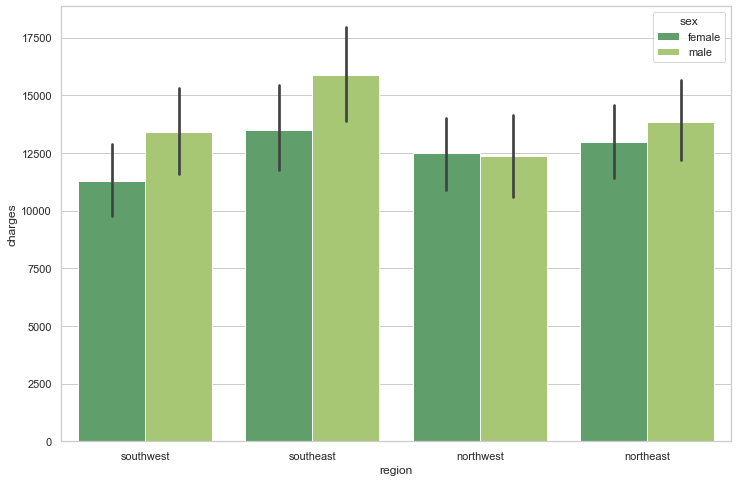

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue= 'sex', data=df ,palette='summer')

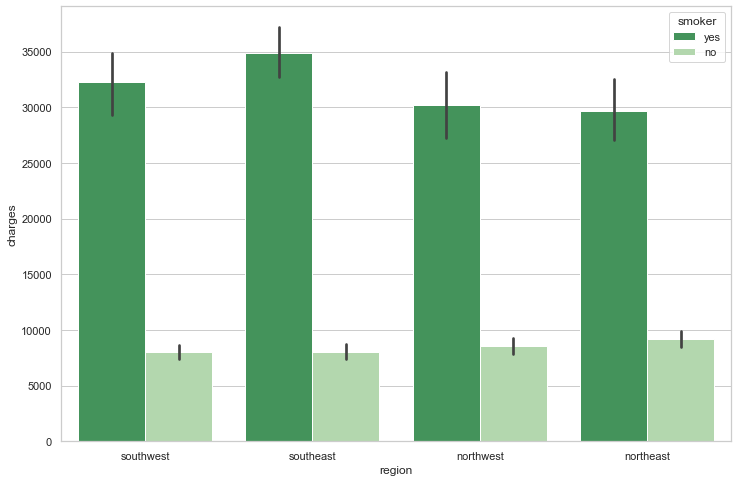

In [13]:
f , ax = plt.subplots(1,1 , figsize= ( 12, 8 ))
ax = sns.barplot(x= 'region', y= 'charges' ,hue='smoker', data=df, palette='Greens_r')

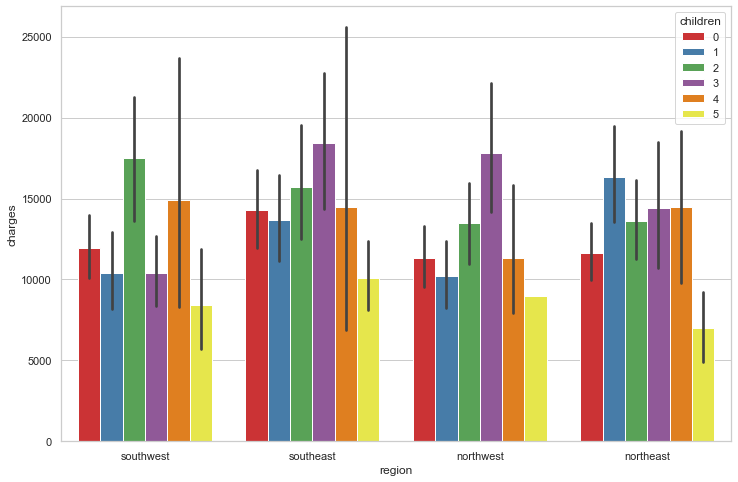

In [14]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax= sns.barplot(x='region', y ='charges' , hue ='children' ,data = df, palette='Set1' )



In [15]:
#As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

#anlisa e midical charges nan pa edat , bmi i children akorda ku e factor di smoking 


In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


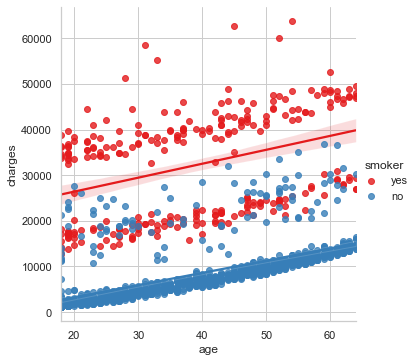

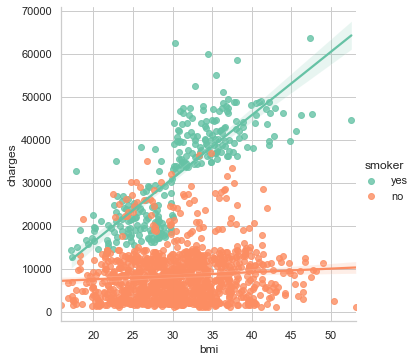

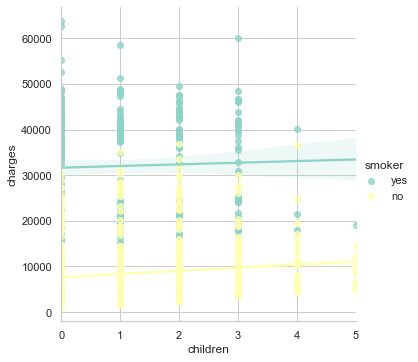

In [17]:
ax = sns.lmplot(x= 'age', y= 'charges', data=df , hue='smoker', palette='Set1')
ax = sns.lmplot(x= 'bmi', y='charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y='charges', data= df , hue='smoker', palette='Set3')


In [18]:
#Smoking tin e impakto mas grandi den e medical cost nan , aunke e cost nan ta krese ku edat ,bmi i yu(children) . tambe hende ku tin yu ta huma menos , kual e siguente vialingplots ta mustra tambe 

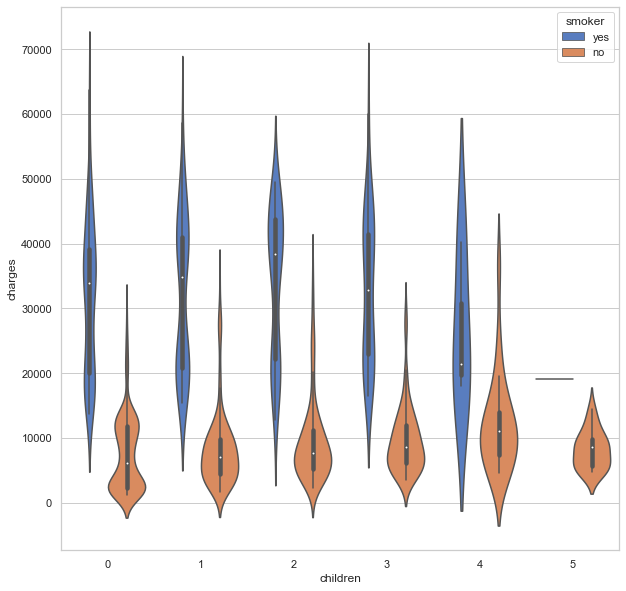

In [19]:
f, ax = plt.subplots(1,1 , figsize=(10, 10 ))
ax = sns.violinplot(x = 'children', y= 'charges', data=df , orient='v', hue='smoker', palette='muted' )

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
## converting object labels into categorial

df[['sex', 'smoker','region']] = df[['sex','smoker','region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [22]:
## converting category labels into numerical data using Labelencoder 

from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker=label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes


age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

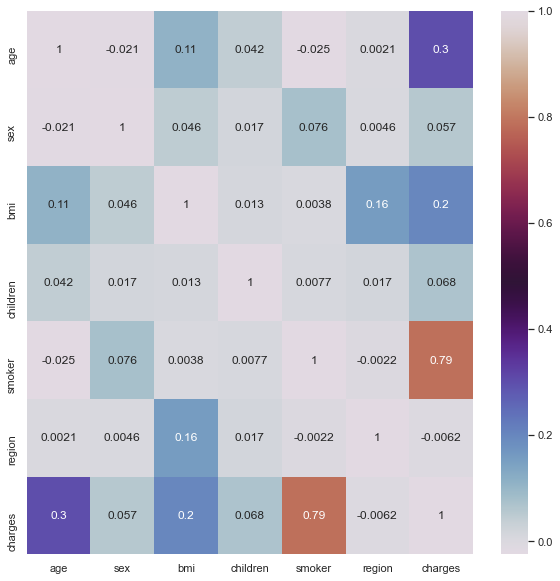

In [23]:
f, ax = plt.subplots(1,1 , figsize=(10, 10 ))
ax = sns.heatmap(df.corr(), annot=True, cmap='twilight')

In [24]:
#Geen verband, behalve met het roken 

# Linear regresion 

In [25]:
# sina e mashin 
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.983908824392
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.799874714544996


In [26]:
#Het resultaat dat we hebben is goed genoeg, maar we kunnen proberen het een beetje te verbeteren door onbelangrijke functies later te verminderen

# Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))



-11643.440927495807
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063138


# Lasso Regression

In [28]:
from sklearn.linear_model import Lasso 
Lasso = Lasso (alpha=0.2 , fit_intercept=True , normalize=False, precompute=True , max_iter=1000, tol=0.0001
, warm_start=False, positive=False, random_state=None , selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.83892903954
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224705


In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

MSE train data: 3628893.887, MSE test data: 19730453.910
R2 train data: 0.971, R2 test data: 0.877


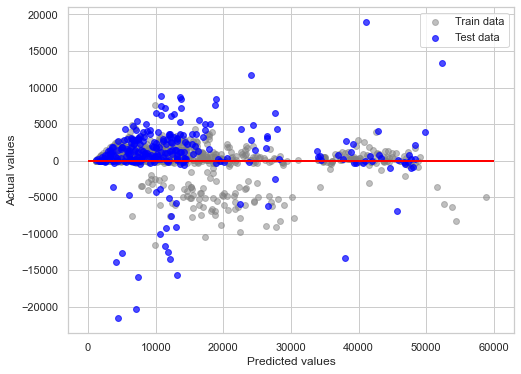

In [31]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

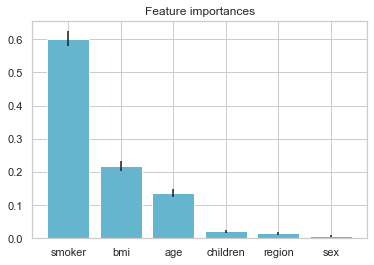

In [32]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# plot de kenmerken van het forest uit
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="c", yerr=std[indices], align="center")


# Polynomial Regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.881705253423
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345233


## Evaluating the performance of the algorithm

In [34]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.495045477638
Mean Squared Error: 18895160.098780315
Root Mean Squared Error: 4346.856346692436


## Predicting the charges

In [35]:

y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df


,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268
